# Numerische Daten in Kategorien einteilen

- cut-Funktion

Hintergrund/Zweck/Anwendung: Beim Plotten können nur kategorische Daten als Gruppierung angezeigt werden. Folglich müssen numerische Daten in kategorische Daten umgewandelt werden
Da Kategorien mit Aliassen arbeitet wird Arbeitsspeichernutzung reduziert.
Macht nur Sinn, wenn wenige Werte in einer (Object) Spalte sind. So ist die Speicherersparnis am Größten.

Bsp Plot: pairplot(hue=kategorische Daten)


- Kategorien automatisch festlegen lassen
- Kategorien selbst festlegen

### Was ist der kategoriale Datentyp?


https://www.data-science-architect.de/categorial-pandas/

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Kategorien automatisch festlegen lassen

In [2]:
# anhand eines Beispiels

df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Die Spalte Beschleunigung soll in 5 Kategorien eingeteilt werden. Bei der cut-Funktion kann man die Anzahl der Kategorien mitgeben. In dem Fall teilt sich die Cut-Funktion von selbst ein, welche Bandbreite sie verwendet für die Einteilung. 

In [3]:
df_mpg['acceleration'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [4]:
# je höher der wert, desto langsamer die Beschleugnigung
# kleine Zahl --> schnell; größere Zahlen --> langsamer
 
kategorien = ['super-schnell','schnell','normal','langsam','schneckentempo']

df_mpg['Beschleunigung'] = pd.cut(df_mpg['acceleration'], 5, labels=kategorien)
df_mpg['Beschleunigung_ohne_lable'] = pd.cut(df_mpg['acceleration'], 5) #lable=False
df_mpg 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Beschleunigung,Beschleunigung_ohne_lable
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,schnell,"(11.36, 14.72]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,schnell,"(11.36, 14.72]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,super-schnell,"(7.983, 11.36]"
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,schnell,"(11.36, 14.72]"
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,super-schnell,"(7.983, 11.36]"
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,normal,"(14.72, 18.08]"
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,schneckentempo,"(21.44, 24.8]"
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,schnell,"(11.36, 14.72]"
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,langsam,"(18.08, 21.44]"


In [8]:
df_mpg['Beschleunigung'].unique()

['schnell', 'super-schnell', 'normal', 'langsam', 'schneckentempo']
Categories (5, object): ['super-schnell' < 'schnell' < 'normal' < 'langsam' < 'schneckentempo']

In [9]:
df_mpg.dtypes 

mpg                           float64
cylinders                       int64
displacement                  float64
horsepower                    float64
weight                          int64
acceleration                  float64
model_year                      int64
origin                         object
name                           object
Beschleunigung               category
Beschleunigung_ohne_lable    category
dtype: object

Beschleunigung
normal            172
schnell           136
langsam            58
super-schnell      21
schneckentempo     11
Name: count, dtype: int64


<Axes: >

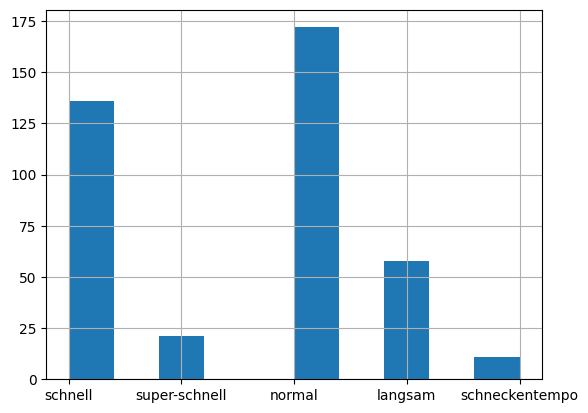

In [6]:
print(df_mpg['Beschleunigung'].value_counts())
# df_mpg['Beschleunigung'].value_counts().plot(kind="barh")
# plt.show()
df_mpg["Beschleunigung"].hist()

In [27]:
df_mpg.loc[df_mpg['Beschleunigung']=='schneckentempo',['acceleration']].min()

acceleration    21.5
dtype: float64

## Kategorien selbst festlegen

In [31]:
df_mpg['acceleration'].min()

np.float64(8.0)

In [32]:
df_mpg['acceleration'].max()

np.float64(24.8)

In [36]:
# je höher der wert, desto langsamer die Beschleugnigung

kategorien = ['super-schnell','schnell','normal','langsam','schneckentempo']

max_value = (df_mpg['acceleration'].max())
min_value = (df_mpg['acceleration'].min())
# max_value = ((df_mpg['acceleration']/df_mpg['horsepower']).max()) * 100
# min_value = ((df_mpg['acceleration']/df_mpg['horsepower']).min()) * 100

print(max_value, min_value)
einteilung = [0,min_value+1,11,15,20,max_value] # 1 Wert mehr, da mit Bereichen gearbeitet wird(z.B: 0 bis min_value,...)
# einteilung_hp = [0,min_value+3,16,30,38,max_value] # 1 Wert mehr, da mit Bereichen gearbeitet wird(z.B: 0 bis min_value,...)

df_mpg['Beschleunigung2'] = pd.cut(df_mpg['acceleration'], bins=einteilung, labels=kategorien)
### Berechnung als Basis für die Kategorisierung ###
# df_mpg['Beschleunigung3'] = pd.cut(((df_mpg['acceleration'] / df_mpg['horsepower']) * 100), bins = einteilung, labels=kategorien)

df_mpg

24.8 8.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Beschleunigung,Beschleunigung_ohne_lable,Beschleunigung2
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,schnell,"(11.36, 14.72]",normal
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,schnell,"(11.36, 14.72]",normal
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,super-schnell,"(7.983, 11.36]",schnell
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,schnell,"(11.36, 14.72]",normal
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,super-schnell,"(7.983, 11.36]",schnell
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,normal,"(14.72, 18.08]",langsam
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,schneckentempo,"(21.44, 24.8]",schneckentempo
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,schnell,"(11.36, 14.72]",normal
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,langsam,"(18.08, 21.44]",langsam


In [ ]:
type(((df_mpg['acceleration'] / df_mpg['horsepower'])*100))

#type(df_mpg['acceleration'])

In [37]:
df_mpg['Beschleunigung2'].unique()

['normal', 'schnell', 'super-schnell', 'langsam', 'schneckentempo']
Categories (5, object): ['super-schnell' < 'schnell' < 'normal' < 'langsam' < 'schneckentempo']

In [38]:
df_mpg['Beschleunigung2'].value_counts()
#df_mpg['Beschleunigung3'].value_counts()

Beschleunigung2
langsam           194
normal            163
schneckentempo     23
schnell            14
super-schnell       4
Name: count, dtype: int64

In [39]:
df_mpg.loc[df_mpg['Beschleunigung2']=='super-schnell']
#df_mpg.loc[df_mpg['Beschleunigung3']=='super-schnell']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Beschleunigung,Beschleunigung_ohne_lable,Beschleunigung2
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,super-schnell,"(7.983, 11.36]",super-schnell
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,super-schnell,"(7.983, 11.36]",super-schnell
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,super-schnell,"(7.983, 11.36]",super-schnell
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340,super-schnell,"(7.983, 11.36]",super-schnell


right= True (Standardverhalten):
(10,20] alle zahlen größer als 10 und kleiner gleich 20.

right= False:
[10,20) alle zahlen größer als gleich 10 und kleiner 20.


# pd.qcut() (Quantile-Cut)

pd.qcut() teilt Daten in Bins auf, sodass jede Bin ungefähr die gleiche Anzahl von Elementen enthält. Der Fokus liegt hier auf der gleichen Häufigkeit pro Gruppe, auch wenn dies bedeutet, dass die Breite der Intervalle (die "Bin-Ränder") unterschiedlich sein kann.

* Gleiche Häufigkeit: Das Hauptmerkmal von qcut() ist, dass die Anzahl der Datenpunkte in jedem Bin annähernd gleich ist.
* Variable Intervallbreiten: Um dies zu erreichen, passen sich die Bin-Grenzen dynamisch an die Verteilung der Daten an. Das bedeutet, die Intervalle können unterschiedlich breit sein.
* Quantile: Wenn Sie beispielsweise q=5 (für Quintile) angeben, teilt pd.qcut() Ihre Daten in 5 Gruppen. Jede Gruppe enthält dann ungefähr 20 % Ihrer Daten. Dies entspricht den 0-20%, 20-40%, 40-60%, 60-80% und 80-100% "Buckets/Bins", wie Sie es beschrieben haben.

In [42]:
df_mpg['Beschleunigung3'] = pd.qcut(df_mpg['acceleration'], q=5)

df_mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Beschleunigung,Beschleunigung_ohne_lable,Beschleunigung2,Beschleunigung3
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,schnell,"(11.36, 14.72]",normal,"(7.999, 13.5]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,schnell,"(11.36, 14.72]",normal,"(7.999, 13.5]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,super-schnell,"(7.983, 11.36]",schnell,"(7.999, 13.5]"
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,schnell,"(11.36, 14.72]",normal,"(7.999, 13.5]"
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,super-schnell,"(7.983, 11.36]",schnell,"(7.999, 13.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,normal,"(14.72, 18.08]",langsam,"(14.8, 16.0]"
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,schneckentempo,"(21.44, 24.8]",schneckentempo,"(17.76, 24.8]"
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,schnell,"(11.36, 14.72]",normal,"(7.999, 13.5]"
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,langsam,"(18.08, 21.44]",langsam,"(17.76, 24.8]"


In [43]:
df_mpg['Beschleunigung3'].value_counts()

Beschleunigung3
(7.999, 13.5]    94
(14.8, 16.0]     84
(17.76, 24.8]    80
(16.0, 17.76]    74
(13.5, 14.8]     66
Name: count, dtype: int64